# Projeto Aplicado
> <p style='text-align: justify;'><font size=3.0>Curso de Estatística para Ciência de Dados e Business Analytics</font></p></br>


><p style='text-align: justify;'><font size=2.2>Liliane de Aquino</font></p>

## Conjunto de dados

<font size=4.5><b>Pesquisa Nacional por Amostra de Domicílios - 2015</b></font>

<p style='text-align: justify;'><font size=3.5>A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> tinha periodicidade anual e pequisava, de forma permanente, características gerais da população como educação, trabalho, rendimento e habitação e outras. O levantamento dessas estatísticas constituiu, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil. A PNAD foi  encerrada em 2016 e substituída, com metodologia atualizada, pela Pesquisa Nacional por Amostra de Domicílios Contínua - PNAD Contínua.</font></p>

<font size=2><b>Fonte dos dados</b>: https://www.ibge.gov.br/estatisticas/sociais/educacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?=&t=microdados</font>

## Dicionário dos dados

> **Renda**: rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.
> ***
> **Idade**: idade do morador na data de referência em anos.
> ***
> **Estado**:
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> **Sexo biológico**	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> **Anos de Estudo**
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> **Raça**
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### Observação
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

## Bibliotecas básicas e outras inicializações

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use(['ggplot'])

plt.rcParams['axes.facecolor']='white'
plt.rcParams['font.family'] = 'Arial, Helvetica, sans-serif'

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
np.set_printoptions(suppress=True, precision=3)

%run mapaVariaveis.py

## Carregamento dos dados

In [2]:
df = pd.read_csv('dataset/dados.csv', header=0, names=['Estado', 'Sexo biologico', 'Idade', 'Raca', 'Anos de Estudo', 'Renda'])
print(f'Linhas: {df.shape[0]} | Colunas: {df.shape[1]}')
df.head(5)

Linhas: 76840 | Colunas: 6


,Estado,Sexo biologico,Idade,Raca,Anos de Estudo,Renda
0,11,0,23,8,12,800
1,11,1,23,2,12,1150
2,11,1,35,8,15,880
3,11,0,46,2,6,3500
4,11,1,47,8,9,150


## Informação dos dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Estado          76840 non-null  int64
 1   Sexo biologico  76840 non-null  int64
 2   Idade           76840 non-null  int64
 3   Raca            76840 non-null  int64
 4   Anos de Estudo  76840 non-null  int64
 5   Renda           76840 non-null  int64
dtypes: int64(6)
memory usage: 3.5 MB


## Comportamento variável Renda

<p style='text-align: justify;'><font size=2.85>Para avaliar o comportamento da variável RENDA, foi construida uma tabela de frequências considerando as seguintes classes em salários mínimos:</font></p>

<b>A</b> ► <font size=2.85>Acima de 25 SM</font>

<b>B</b> ► <font size=2.85>De 15 a 25 SM</font>

<b>C</b> ► <font size=2.85>De 5 a 15 SM</font>

<b>D</b> ► <font size=2.85>De 2 a 5 SM</font>

<b>E</b> ► <font size=2.85>Até 2 SM</font>

<p style='text-align: justify;'><font size=2.85>O salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.</font></p>

Tabela de frequência

In [4]:
print('Intevalos das classes: de %s até %s reais' % (df['Renda'].min(), df['Renda'].max()))
classes = [df['Renda'].min(), 1576, 3940, 11820, 19700, df['Renda'].max()]

labels = ['E', 'D', 'C', 'B', 'A']
frequencia = pd.value_counts(pd.cut(x=df['Renda'], bins=classes, labels=labels, include_lowest=True))
frequencia

Intevalos das classes: de 0 até 200000 reais


E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

Coluna de percentuais

In [5]:
percentual = pd.value_counts(pd.cut(x=df['Renda'], bins=classes, labels=labels, include_lowest=True), normalize=True)
dist_freq = pd.DataFrame({'Frequência': frequencia, 'Percentual (%)': percentual})
dist_freq.sort_index(ascending=False)

,Frequência,Percentual (%)
A,420,0.005466
B,822,0.010698
C,7241,0.094235
D,18602,0.242087
E,49755,0.647514


Gráfico de barras

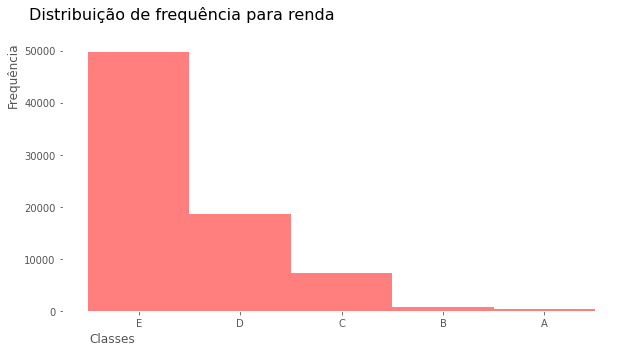

In [6]:
dist_freq['Frequência'].plot.bar(width=1, color='red', alpha=0.5, figsize=(10, 5), rot=False)
plt.title('Distribuição de frequência para renda', fontsize=16, y=1.05, loc='left', x=-0.06)
plt.xlabel('Classes', fontsize=12, horizontalalignment='right', x=0.13)
plt.ylabel('Frequência', fontsize=12, horizontalalignment='left', y=0.75)
plt.show()

<p style='text-align: justify;'><font size=2.85>Cerca de 65% dos entrevistados pertenciam a classe E, ou seja, possuiam uma renda de até 2 salários mínimos (1576 reais).</font></p>

## Histogramas

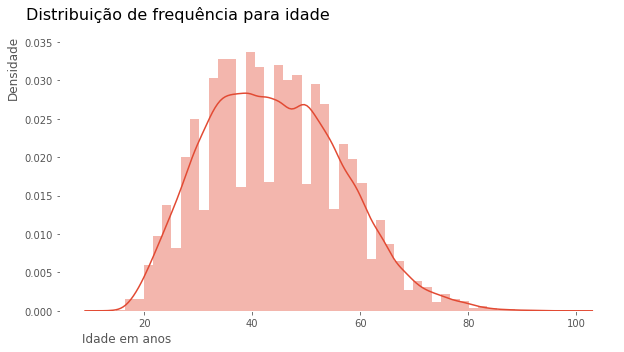

In [7]:
ax = sns.distplot(df['Idade'], kde=True)
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição de frequência para idade', fontsize=16, y=1.05, loc='left', x=-0.06)
ax.set_xlabel('Idade em anos', fontsize=12, horizontalalignment='right', x=0.20)
ax.set_ylabel('Densidade', fontsize=12, horizontalalignment='left', y=0.78)
plt.show()

<p style='text-align: justify;'><font size=2.85>A variável idade possui muitos picos e vales e uma curva parecida com a normal. Existe uma grande variação, temos de pessoas de 13 a 99 anos. È uma distribuição assimétrica à direita.</font></p>

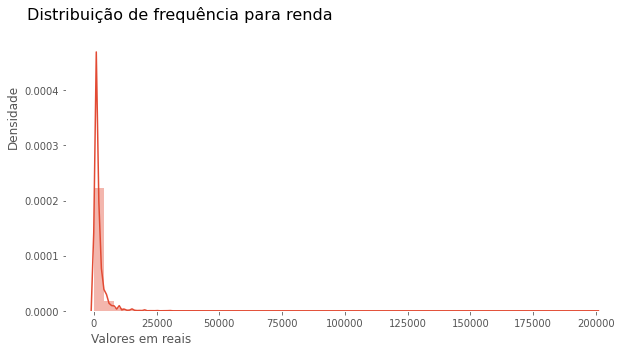

In [8]:
ax = sns.distplot(df['Renda'], kde=True)
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição de frequência para renda', fontsize=16, y=1.05, loc='left', x=-0.07)
ax.set_xlabel('Valores em reais', fontsize=12, horizontalalignment='right', x=0.225)
ax.set_ylabel('Densidade', fontsize=12, horizontalalignment='left', y=0.60)
plt.show()

<p style='text-align: justify;'><font size=2.85>A variável Renda possui uma assimetria à direita, o que indica que boa parte das pessoas que compõe essa base recebem salários mais baixos. Podemos ver também a existência de alguns valores mais altos.</font></p>

## Análise descritiva para a variável Renda

In [9]:
sample = df.drop(['Estado', 'Sexo biologico', 'Raca'], axis=1)
sample['Anos de Estudo'] = sample['Anos de Estudo'].map(map_anos_estudos)
sample.describe()

,Idade,Anos de Estudo,Renda
count,76840.000000,76840.000000,76840.000000
mean,44.071421,8.427408,2000.383199
std,12.480583,4.548749,3323.387730
min,13.000000,-1.000000,0.000000
25%,34.000000,5.000000,788.000000
50%,43.000000,9.000000,1200.000000
75%,53.000000,11.000000,2000.000000
max,99.000000,15.000000,200000.000000


<p style='text-align: justify;'><font size=2.85>A idade média é de 44 anos com uma variação de 12,5 anos. A idade varia entre 13 e 99 anos e os anos passados na escola eram, em média, 8 com 25% da nossa amostra tendo estudado 5 anos ou menos.</font></p>
<p style='text-align: justify;'><font size=2.85>A renda média das famílias, em 2015, era de 2000,38 reais com uma variação de 3323,38 reais. Metade da nossa amostra recebia até 1.5 salário mínimo e cerca de 19.210 pessoas viviam com 1 salário minimo ou menos.</font></p>

## Renda por raça e sexo biológico

<p style='text-align: justify;'><font size=2.85>Na nossa amostra, para cada 2.257 homens chefes de família, há 1 mulher. Por isso, para mantermos uma comparação justa, usaremos uma amostra aleatória equilibrada de 10000 instâncias.</font></p>

In [10]:
sample = df.groupby('Sexo biologico').apply(lambda x : x.sample(n=10000, replace=False))
print(sample['Sexo biologico'].value_counts(normalize=True)*100)

0    50.0
1    50.0
Name: Sexo biologico, dtype: float64


In [11]:
analise_renda = pd.crosstab(sample['Raca'], sample['Sexo biologico'], values=sample['Renda'], aggfunc={'mean', 'median', 'max', 'std'})
analise_renda.rename(index=raca, inplace=True)
analise_renda.rename(columns=sexo_biologico, inplace=True)
analise_renda

max                   mean                 median  \
Sexo biologico Masculino  Feminino    Masculino     Feminino Masculino   
Raca                                                                     
Indígena          5000.0   12500.0   887.940000  1457.289474     675.0   
Branca           80000.0  100000.0  2849.559990  2165.421287    1600.0   
Preta            48000.0   18000.0  1653.888060  1139.119142    1200.0   
Amarela          20000.0   20000.0  4050.303030  3623.340426    2500.0   
Parda            50000.0   30000.0  1641.105073  1174.604203    1200.0   

                                 std               
Sexo biologico Feminino    Masculino     Feminino  
Raca                                               
Indígena          788.0  1017.276745  2231.792976  
Branca           1200.0  3865.858040  3460.635088  
Preta             800.0  2233.394557  1302.831893  
Amarela          1500.0  5151.377537  4521.775297  
Parda             800.0  2245.951439  1608.531572

<p style='text-align: justify;'><font size=2.85>Homens indígenas e mulheres negras eram o grupo que possuem a renda média mais baixa. Analisado a mediana, percebemos que, em geral, os homens possuiam renda superior a das mulheres.</font></p>

## Renda por anos de estudo e sexo biológico

In [12]:
analise_renda_2 = pd.crosstab(sample['Anos de Estudo'], sample['Sexo biologico'], values=sample['Renda'], aggfunc={'mean', 'median', 'max', 'std'})
analise_renda_2.rename(index=anos_de_estudo, inplace=True)
analise_renda_2.rename(columns=sexo_biologico, inplace=True)
analise_renda_2

max                   mean               \
Sexo biologico                 Masculino  Feminino    Masculino     Feminino   
Anos de Estudo                                                                 
Sem instrução e menos de 1 ano    7100.0   10000.0   757.216092   547.810903   
1 ano                             6000.0    2000.0   825.446154   479.544776   
2 anos                           15000.0    4000.0   956.614650   502.312500   
3 anos                           80000.0    1900.0  1314.904878   540.578595   
4 anos                           50000.0   10000.0  1374.026795   715.159280   
5 anos                           30000.0    7880.0  1299.624161   771.171963   
6 anos                           20000.0    6000.0  1417.670520   851.629344   
7 anos                            7000.0    3000.0  1323.061625   798.982578   
8 anos                           25000.0   16000.0  1621.563889   928.072572   
9 anos                            6000.0    3500.0  1387.508403   843.829268   
10 anos                           8000.0    5000.0  1571.228956   940.634328   
11 anos                          48000.0  100000.0  2070.978988  1310.314990   
12 anos                          14000.0   15580.0  2447.309417  1553.647059   
13 anos                          25000.0   20000.0  3409.872093  2097.408602   
14 anos                          22000.0   15000.0  3540.912500  2333.040323   
15 anos ou mais                  50000.0   60000.0  5895.195902  3960.308416   
Não determinados                  2000.0    1500.0  1169.157895   699.925926   

                                  median                   std               
Sexo biologico                 Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     625.0    400.0   772.886477   718.267709  
1 ano                              700.0    397.0   767.167868   421.777756  
2 anos                             788.0    400.0  1098.155134   513.033757  
3 anos                             800.0    555.0  4101.993283   382.446623  
4 anos                            1000.0    788.0  2106.615883   712.688032  
5 anos                            1000.0    788.0  1501.125104   643.940381  
6 anos                            1100.0    788.0  1524.537969   571.435037  
7 anos                            1117.0    788.0   879.664617   486.017270  
8 anos                            1300.0    800.0  1476.060087   795.433388  
9 anos                            1200.0    788.0   898.540480   568.008360  
10 anos                           1300.0    800.0  1112.740127   668.898150  
11 anos                           1500.0    980.0  2064.710236  2264.105014  
12 anos                           1800.0   1200.0  1888.236622  1560.897910  
13 anos                           2500.0   1500.0  3253.442406  2563.850104  
14 anos                           2500.0   1786.5  3074.169566  2064.107884  
15 anos ou mais                   4000.0   2900.0  5769.806539  4223.333517  
Não determinados                  1200.0    788.0   627.510271   357.881150

<p style='text-align: justify;'><font size=2.85>Como regra geral, quanto mais anos de estudo, maior é a média salarial. Percebemos que, a média salarial dos homens era superior a das mulheres para todos os níveis de escolaridade e existem casos em que, mesmo com mais anos de estudos, o salário das mulheres era inferior ao de homens com menos instrução.</font></p> <p style='text-align: justify;'>
    
<font size=2.85>Por exemplo, uma mulher que estudou 6 anos recebia um valor médio inferior a de homens com 2 anos de instrução. Pela mediana, ambos passam a receber o mesmo valor de 1 salário mínimo.</font></p>

## Análise outliers para Renda

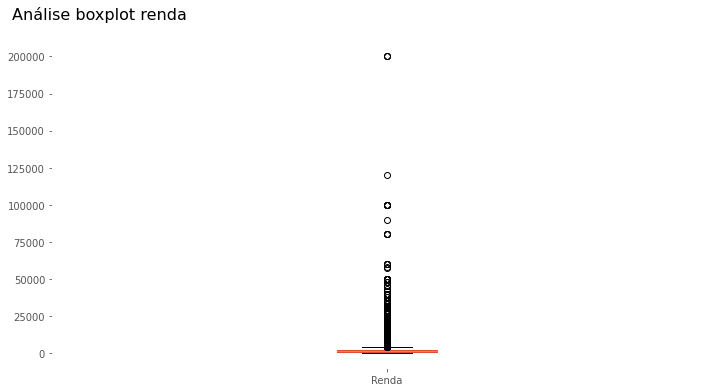

In [13]:
df.boxplot(['Renda'], figsize=(12, 6))
plt.title('Análise boxplot renda', fontsize=16, y=1.05, loc='left', x=-0.06)
plt.show()

<p style='text-align: justify;'><font size=2.85>Podemos ver que existem possíveis outliers na nossa amostra, porém os valores de renda estão muitos dispersos ficando difícil determinar o que de fato é outlier. Também temos uma cauda para a direita, o que indica uma grande concentração em salário mais baixos.</font></p>

## Análise de correlação

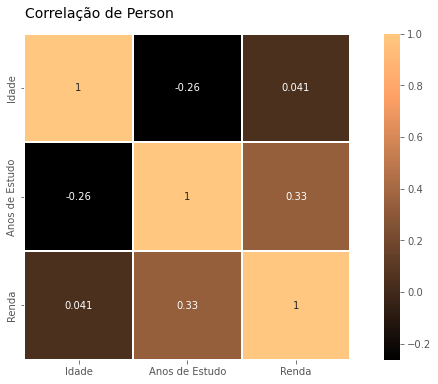

In [14]:
df['Anos de Estudo'] = df['Anos de Estudo'].map(map_anos_estudos)
corr = df.drop(['Estado', 'Sexo biologico', 'Raca'], axis=1).corr()

plt.figure(figsize=(12, 6))
plt.title('Correlação de Person', y=1.03, size=14, loc='left', x=0.001)
sns.heatmap(corr, linewidths=0.1, vmax=1.0, square=True, cmap=plt.cm.copper, linecolor='white', annot=True)
plt.xticks(rotation=0, ha='center')
plt.show()

<p style='text-align: justify;'><font size=2.85>Parece não existir correlação entre nossas variáveis, uma vez que todas possuem um grau de correlação bem fraco. O maior grau de correlação está associado a renda e aos anos de Estudo.</font></p>

## Gráficos de correlação

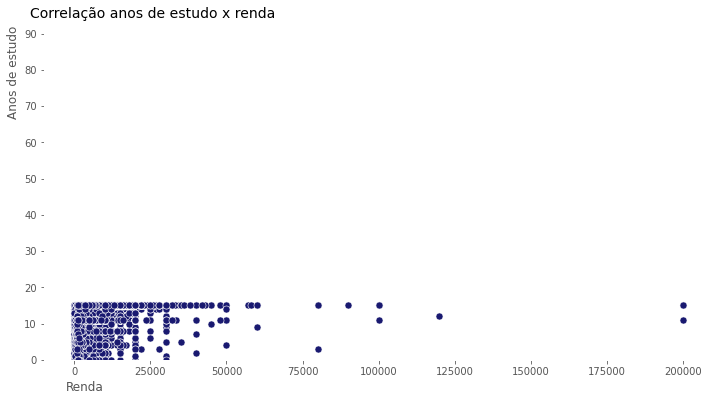

In [15]:
plt.rcParams['figure.figsize'] = [12, 6]
sns.scatterplot(x='Renda', y='Anos de Estudo', data=df, color='#191970', s=50)

plt.title('Correlação anos de estudo x renda', y=1.03, size=14, loc='left', x=-0.02)
plt.ylabel('Anos de estudo', horizontalalignment='left', y=0.74)
plt.xlabel('Renda', horizontalalignment='right', x=0.09)
plt.ylim(0, 90)
plt.show()

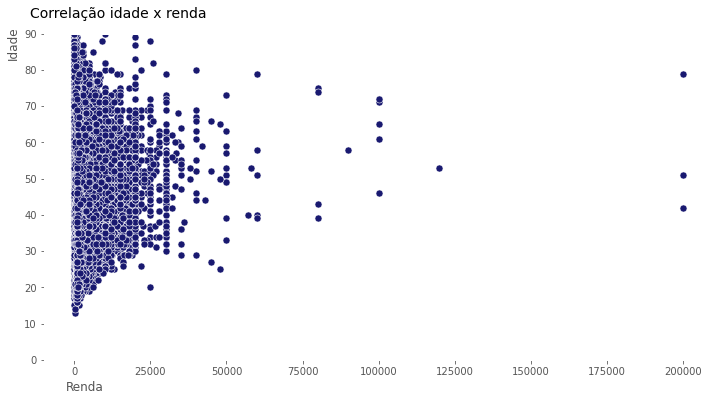

In [16]:
plt.rcParams['figure.figsize'] = [12, 6]
sns.scatterplot(x='Renda', y='Idade', data=df, color='#191970', s=50)

plt.title('Correlação idade x renda', y=1.03, size=14, loc='left', x=-0.02)
plt.ylabel('Idade', horizontalalignment='left', y=0.92)
plt.xlabel('Renda', horizontalalignment='right', x=0.09)
plt.ylim(0, 90)
plt.show()